# HT 6. Modelos de Regresión Logística

## Miembros
- Francisco Javier Castillo Cerna 21562
- Fernanda Esquivel de León 21542
- Andrés Estuardo Montoya 21552

## Link al repositorio 
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DM-House-Saleprice-Predictor)

## Link al documento
El documento puede ser visualizado [acá](https://docs.google.com/document/d/1epV70f3ZMXSBei_e2BAuRYk5oIA3SR9INmNR5e3FXoE/edit?usp=sharing)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
df["MSZoning"] = le.fit_transform(df["MSZoning"])
df["Street"] = le.fit_transform(df["Street"])
df["Alley"] = le.fit_transform(df["Alley"])
df["LotShape"] = le.fit_transform(df["LotShape"])
df["LandContour"] = le.fit_transform(df["LandContour"])
df["Utilities"] = le.fit_transform(df["Utilities"])
df["LotConfig"] = le.fit_transform(df["LotConfig"])
df["LandSlope"] = df["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])
df["Condition1"] = le.fit_transform(df["Condition1"])
df["Condition2"] = le.fit_transform(df["Condition2"])
df["BldgType"] = le.fit_transform(df["BldgType"])
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
df["ExterQual"] = df["ExterQual"].map(condition_map)
df["ExterCond"] = df["ExterCond"].map(condition_map)
df["Foundation"] = le.fit_transform(df["Foundation"])
df["BsmtQual"] = df["BsmtQual"].map(condition_map)
df["BsmtCond"] = df["BsmtCond"].map(condition_map)
df["BsmtExposure"] = df["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
df["BsmtFinType1"] = df["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
df["BsmtFinType2"] = df["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
df["Heating"] = le.fit_transform(df["Heating"])
df["HeatingQC"] = df["HeatingQC"].map(condition_map)
df["CentralAir"] = le.fit_transform(df["CentralAir"])
df["Electrical"] = df["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
df["KitchenQual"] = df["KitchenQual"].map(condition_map)
df["Functional"] = le.fit_transform(df["Functional"])
df["FireplaceQu"] = df["FireplaceQu"].map(condition_map)
df["GarageType"] = le.fit_transform(df["GarageType"])
df["GarageFinish"] = df["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
df["GarageQual"] = df["GarageQual"].map(condition_map)
df["GarageCond"] = df["GarageCond"].map(condition_map)
df["PavedDrive"] = df["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
df["PoolQC"] = df["PoolQC"].map(condition_map)
df["Fence"] = df["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])
df["SaleType"] = le.fit_transform(df["SaleType"])
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(0)


In [31]:
price_class_df = df.copy()
lower_limit = np.percentile(price_class_df['SalePrice'], 33)
upper_limit = np.percentile(price_class_df['SalePrice'], 66)

def classify_house(price):
    if price < lower_limit:
        return 'Economical'
    elif price < upper_limit:
        return 'Intermediate'
    else:
        return 'Expensive'

price_class_df['Classification'] = price_class_df['SalePrice'].apply(classify_house)

print(price_class_df[['SalePrice', 'Classification']].head())

   SalePrice Classification
0     208500      Expensive
1     181500   Intermediate
2     223500      Expensive
3     140000   Intermediate
4     250000      Expensive


In [32]:
price_class_df['IsExpensive'] = (price_class_df['Classification'] == 'Expensive').astype(int)
price_class_df['IsIntermediate'] = (price_class_df['Classification'] == 'Intermediate').astype(int)
price_class_df['IsEconomical'] = (price_class_df['Classification'] == 'Economical').astype(int)

In [33]:
print(price_class_df[['Classification', 'IsExpensive', 'IsIntermediate', 'IsEconomical']].head())

  Classification  IsExpensive  IsIntermediate  IsEconomical
0      Expensive            1               0             0
1   Intermediate            0               1             0
2      Expensive            1               0             0
3   Intermediate            0               1             0
4      Expensive            1               0             0


## 2

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

In [35]:
X = price_class_df.drop(columns=["Id", "SalePrice", "Classification", "IsExpensive", "IsIntermediate", "IsEconomical"])
y = price_class_df["IsExpensive"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
gnb = GaussianNB()

In [38]:
gnb.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred = gnb.predict(X_test)

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = gnb.score(X_test, y_test)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 0.40119683960568414
R2: 0.839041095890411


## 3

In [41]:
model = LogisticRegression(solver='liblinear', max_iter=1000)

In [42]:
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=5)

In [43]:
print("Precisión de validación cruzada en cada pliegue: ", scores)
print("Precisión media de validación cruzada: ", scores.mean())

Precisión de validación cruzada en cada pliegue:  [0.91452991 0.88888889 0.94017094 0.90128755 0.93562232]
Precisión media de validación cruzada:  0.9160999229668757


# 4

In [44]:
# Calculo de VIF para cada variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

X_train_const = add_constant(X_train)

vif_data = pd.DataFrame()
vif_data['feature'] = X_train_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

print(vif_data)


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          feature           VIF
0           const  2.599763e+06
1      MSSubClass  5.533222e+00
2        MSZoning  1.400416e+00
3     LotFrontage  1.402632e+00
4         LotArea  1.776529e+00
..            ...           ...
75        MiscVal  1.693587e+00
76         MoSold  1.096128e+00
77         YrSold  1.103613e+00
78       SaleType  1.164254e+00
79  SaleCondition  1.247673e+00

[80 rows x 2 columns]


In [45]:
#Ajuste del modelo de regresión logística y examinación de los p-values de las variables
logit_model = sm.Logit(y_train, X_train_const)
logit_result = logit_model.fit()

print(logit_result.summary())


         Current function value: 0.175716
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            IsExpensive   No. Observations:                 1168
Model:                          Logit   Df Residuals:                     1088
Method:                           MLE   Df Model:                           79
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.7271
Time:                        16:36:27   Log-Likelihood:                -205.24
converged:                      False   LL-Null:                       -751.92
Covariance Type:            nonrobust   LLR p-value:                3.161e-178
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -278.1675    219.475     -1.267      0.205    -708.330     151.995
MSSubClass       -0.0269      0.014     -1.882      0.06

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
#Evaluación el ajuste del modelo
X_test_const = add_constant(X_test)

#Se usa el resultado del modelo ajustado para hacer predicciones
y_pred = logit_result.predict(X_test_const)

#Se calcula la precisión y el AUC con las predicciones
accuracy = accuracy_score(y_test, y_pred.round())
auc = roc_auc_score(y_test, y_pred)

print(f'Precisión: {accuracy}')
print(f'AUC: {auc}')



Precisión: 0.9212328767123288
AUC: 0.9803900614480363



Los resultados muestran que el modelo de regresión logística tiene un pseudo R-cuadrado de 0.7271, lo que indica que el modelo explica aproximadamente el 72.71% de la variabilidad en la clasificación de las viviendas como caras o no. Este valor sugiere que el modelo tiene un buen ajuste. 

En cuanto a la multicolinealidad, el VIF para la mayoría de las variables está por debajo de 10, lo que sugiere que no hay problemas graves de multicolinealidad que afecten al modelo.

Observando los p-values en el resumen del modelo, varias variables, como MSZoning, Alley, y LotShape, tienen p-values menores de 0.05, indicando que son significativas en el modelo. Esto significa que estas variables contribuyen de manera significativa a la predicción de si una vivienda es cara o no.

En términos de rendimiento del modelo, la precisión es del 92.12% y el AUC es de 0.980, ambos indicadores muy altos, lo que demuestra que el modelo es muy efectivo en clasificar correctamente las viviendas.

En conclusión, el modelo parece adaptarse bien a los datos, con un buen nivel de explicación de la variabilidad y un rendimiento excelente en la clasificación. .

# 5

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

X_test_const = add_constant(X_test)

#Se usa el resultado del modelo ajustado para hacer predicciones
y_pred = logit_result.predict(X_test_const)

#Calcular la precisión, AUC y otras métricas
accuracy = accuracy_score(y_test, y_pred.round())
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred.round())
class_report = classification_report(y_test, y_pred.round())

print(f'Precisión: {accuracy}')
print(f'AUC: {auc}')
print('Matriz de confusión:')
print(conf_matrix)
print('Reporte de clasificación:')
print(class_report)


Precisión: 0.9212328767123288
AUC: 0.9803900614480363
Matriz de confusión:
[[185  12]
 [ 11  84]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       197
           1       0.88      0.88      0.88        95

    accuracy                           0.92       292
   macro avg       0.91      0.91      0.91       292
weighted avg       0.92      0.92      0.92       292




La eficiencia del modelo de regresión puede considerar alta, pues cuenta con una precisión del 92.12% y un AUC de 0.980. Estas métricas indican un excelente rendimiento del modelo en la diferenciación entre las clases. La matriz de confusión muestra que el modelo ha clasificado correctamente 185 viviendas como no caras y 84 como caras, con solo 12 y 11 errores de clasificación, respectivamente, lo que refleja una buena capacidad de generalización.

Además, el reporte de clasificación detalla una precisión y recall de 0.94 y 0.88 para las clases no cara y cara respectivamente, lo cual sugiere que el modelo es equilibrado en términos de sensibilidad y especificidad. 

# 6

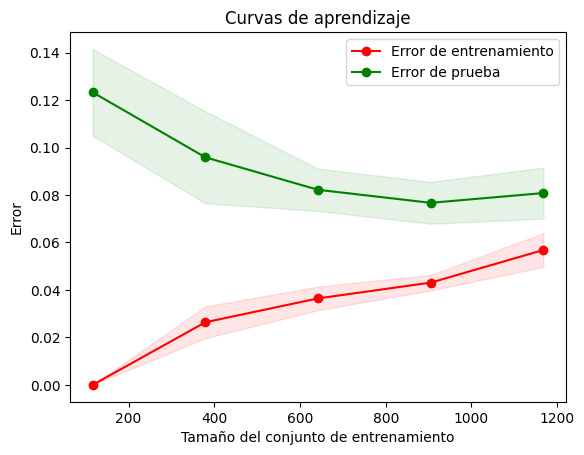

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(solver='liblinear'), 
    X, y, 
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5)
)

#Calculo de las medias y desviaciones estándar del error de entrenamiento y prueba
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Se grafican las curvas de aprendizaje
plt.figure()
plt.title("Curvas de aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Error de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Error de prueba")

plt.legend(loc="best")
plt.show()



La curva de aprendizaje nos muestra que no hay sobreajuste significativo en el modelo de regresión logística. El error de entrenamiento muestra un aumento marginal con el incremento en el tamaño del conjunto de entrenamiento, mientras que el error de prueba disminuye, y ambas curvas tienden a converger. La proximidad de las dos curvas y la disminución de su desviación estándar indican que el modelo mantiene una buena generalización a medida que se introducen más datos. Esto sugiere que el modelo está bien ajustado, con un rendimiento estable en los datos de entrenamiento y de prueba, lo cual es indicativo de una buena capacidad de generalización y una eficiencia adecuada en la clasificación de viviendas como caras o no.